In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from forward_models import ct
from forward_models import denoising

from data_pips import BSDS

from Framework import adversarial_regulariser
from Framework import positiv_adversarial_regulariser
from Framework import postprocessing
from Framework import iterative_scheme
from Framework import total_variation
from Framework import generic_framework
from Framework import total_variation

import util as ut

from networks import multiscale_l1_classifier

tv = total_variation()
lmb = []
for k in range(10):
    lmb.append(3**(k-13))
tv.find_TV_lambda(lmb)

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Training Data found: 397
Evaluation Data found: 278


Quality of reconstructed image: 5.13925


Lambda: 6.272254743863069e-07, MSE: 5.1392464724, OriginalError: 7.37852353527


Quality of reconstructed image: 5.08819


Lambda: 1.8816764231589208e-06, MSE: 5.08819334011, OriginalError: 7.37852353527


Quality of reconstructed image: 4.97884
Lambda: 5.645029269476762e-06, MSE: 4.97884133842, OriginalError: 7.37852353527


Quality of reconstructed image: 4.79685
Lambda: 1.6935087808430286e-05, MSE: 4.79684699373, OriginalError: 7.37852353527


Quality of reconstructed image: 4.49969
Lambda: 5.080526342529086e-05, MSE: 4.49968535928, OriginalError: 7.37852353527


Quality of reconstructed image: 3.91641
Lambda: 0.00015241579027587258, MSE: 3.91641231295, OriginalError: 7.37852353527


Quality of reconstructed image: 3.28245
Lambda: 0.0004572473708276177, MSE: 3.28245467864, OriginalError: 7.37852353527


Quality of reconstructed image: 3.40842


Lambda: 0.0013717421124828531, MSE: 3.40841821043, OriginalError: 7.37852353527


Quality of reconstructed image: 4.00516


Lambda: 0.00411522633744856, MSE: 4.00516333401, OriginalError: 7.37852353527


Quality of reconstructed image: 4.88146


Lambda: 0.012345679012345678, MSE: 4.88146223722, OriginalError: 7.37852353527


In [7]:
from skimage.measure import compare_ssim as ssim

from Framework import generic_framework

frame = generic_framework()
y, x, fbp = frame.generate_training_data(1)

print(ssim(x[0,...,0], fbp[0,...,0]))

Training Data found: 397
Evaluation Data found: 278
0.684210259023


C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [19]:
a = [1, 2, 3, 4]
b = a[2:4]
print(b)

[3, 4]


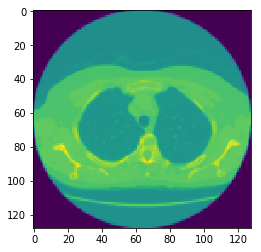

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [4]:
import

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\odl\contrib\tensorflow\__init__.py
0.6.1.dev0


In [16]:
import tensorflow as tf
from util import lrelu
### resnet architectures
def apply_conv(x, filters=32, kernel_size=3):
    return tf.layers.conv2d(x, filters=filters, kernel_size=kernel_size, padding='SAME',
                            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(),
                            activation=lrelu)

def resblock(x, filters):
    with tf.name_scope('resblock_bn'):
        x = tf.identity(x)
        update = apply_conv(x, filters=filters)
        update = apply_conv(update, filters=filters)

        skip = tf.layers.conv2d(x, filters=filters, kernel_size=1, padding='SAME',
                                kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
        return skip + update
    
def meanpool(x):
    with tf.name_scope('meanpool'):
        x = tf.identity(x)
        return tf.add_n([x[:, ::2, ::2, :], x[:, 1::2, ::2, :],
                         x[:, ::2, 1::2, :], x[:, 1::2, 1::2, :]]) / 4.

In [29]:
import tensorflow as tf
sess = tf.InteractiveSession
pic = tf.placeholder(shape=[None, 128, 128, 1],
                             dtype=tf.float32)
with tf.name_scope('pre_process'):
    x = apply_conv(pic, filters=64, kernel_size=3)

with tf.name_scope('x1'):
    x = resblock(x, 64)

with tf.name_scope('x2'):
    x = resblock(meanpool(x), filters=64)  # 1/2

with tf.name_scope('x3'):
    x = resblock(meanpool(x), filters=128)  # 1/4

with tf.name_scope('x4'):
    x = resblock(meanpool(x), filters=256)  # 1/8


with tf.name_scope('post_process'):
    flat = tf.contrib.layers.flatten(x)
    flat = tf.layers.dense(flat, 1)

In [30]:
x.get_shape().as_list()

[None, 16, 16, 256]